In [1]:
# add matplotliv inline magic command and dependencies
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


### 5.2.4 Use df.count() to find any nulls!

In [5]:
# get the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# get the columns and rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# get the data types of each columng
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# get the uniques values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# get the number of data points for the "urban" cities
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Inspect the rid_data.csv 

In [11]:
# get the columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Make sure there are no null values, 
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
#get the data types for each col. of ride.csv
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# NOW Merge the data frames 
#Combine data into single dataset.
pyber_data_df = pd.merge(ride_data_df, city_data_df, 
                         how="left", on=["city", "city"])

# display the new dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### 5.3.1 Create DataFrames for Each Type of City

#### Completing the steps will be more efficient if we create separate DataFrames for each type and then create Data Series for each step.

In [15]:
# create the urban city dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [388]:
# create suburban and rural dataframes
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]== "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


#### 5.3.2 Get the Number of Rides for Each City Type
#### To create a Data Series with one of the columns in a DataFrame, we can use the groupby() function and add the column inside the parentheses.

In [17]:
# get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [18]:
# Create same for suburban and rural ride counts
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

#### We now have one of the three datasets we need to create a bubble chart. Next, we'll use the groupby() function on the city type DataFrames to get the average fare for each city type. This will be our second dataset.

In [19]:
#5.3.3 get avg fare per city with grouby() and chain mean()

In [20]:
# get average fare per city in urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# get average fare per city with groupby and mean for suburban & rural
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


#### 5.3.4 Get the Average Number of Drivers for Each City Type

In [22]:
# we have # of rides, and average fare. How does average number of drivers
#per city affect the rides and fare? 
# get average # of drivers for urban city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [185]:
# get average # drivers for the other 2 types, suburb and rural
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
#rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count.mean()

13.61111111111111

#### Now we have all our data and can begin to create our bubble chart!  
#### The first scatter plot we'll make is for urban cities. We'll create our plots using the MATLAB method. plt.scatter()

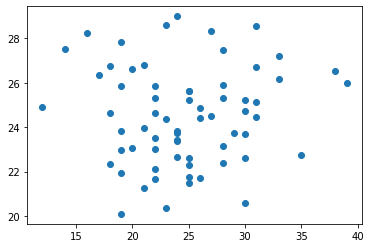

In [24]:
# build the scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare)

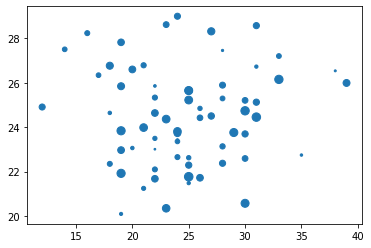

In [25]:
# now add title, axes labels legend, and change color and sizes to scatter
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=urban_driver_count)


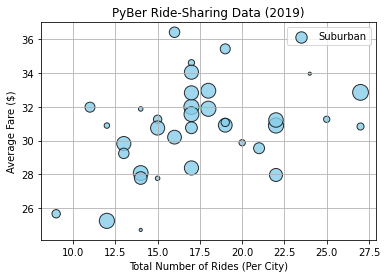

In [26]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()


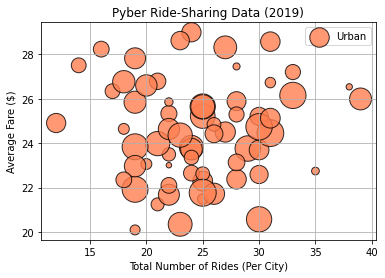

In [27]:
# build scatter plot for urban cities with all the extras
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

In [28]:
# ??? Where is the data below? not showing!

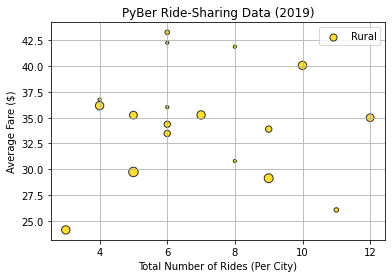

In [29]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

#### 5.3.6 Create scatter chart for all cities

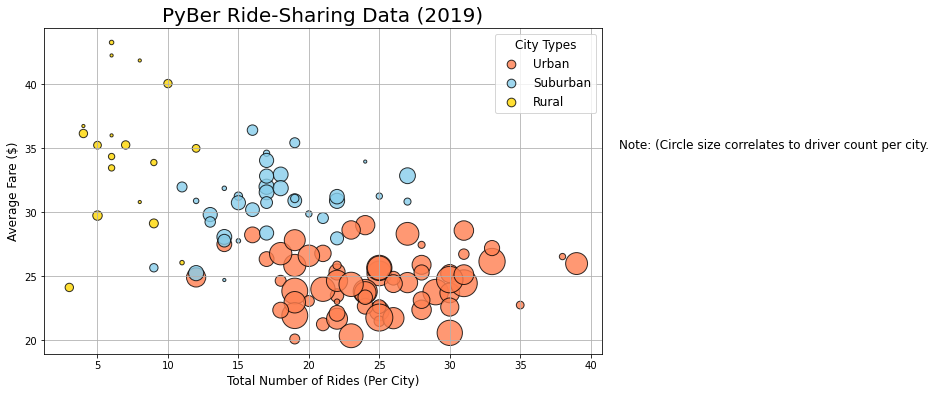

In [68]:
# Add the three scatter charts for 3 city types
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
    urban_avg_fare,
    s=10*urban_driver_count, c="coral",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
    suburban_avg_fare,
    s=10*suburban_driver_count, c="skyblue",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Suburban")
                
plt.scatter(rural_ride_count, 
    rural_avg_fare,
    s=10*rural_driver_count, c="gold",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# create a legend to fix markers to be same size
lgnd = plt.legend(fontsize="12", mode="Expanded",
        scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#REMOVED plt.legend to allow the legend above to work!!
#add legend
#plt.legend()

# add a text label acout circle size
plt.text(42, 35, "Note: (Circle size correlates to driver count per city.", fontsize="12")

# save the figure
plt.savefig("/Users/damonphillips/Desktop/bootcamp/week_5_Matplotlib/PyBer_Analysis/Fig1.png")

# Show the plot
plt.show()

#### 5.4.1 Summary Statistics for Number of Rides by City Type

In [121]:
# get summary statistics
urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [122]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [126]:
suburban_ride_count.dtype

dtype('int64')

In [119]:
round(urban_cities_df.mean(),2), round(suburban_cities_df.mean(),2), round(rural_cities_df.mean(),2)


/Users/damonphillips/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


(fare            2.453000e+01
 ride_id         4.873485e+12
 driver_count    3.668000e+01
 dtype: float64,
 fare            3.097000e+01
 ride_id         4.971015e+12
 driver_count    1.371000e+01
 dtype: float64,
 fare            3.462000e+01
 ride_id         4.647746e+12
 driver_count    4.300000e+00
 dtype: float64)

In [131]:
round(urban_cities_df.mean(),2), round(suburban_cities_df.mean(),2), round(rural_cities_df.mean(),2)

/Users/damonphillips/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


(fare            2.453000e+01
 ride_id         4.873485e+12
 driver_count    3.668000e+01
 dtype: float64,
 fare            3.097000e+01
 ride_id         4.971015e+12
 driver_count    1.371000e+01
 dtype: float64,
 fare            3.462000e+01
 ride_id         4.647746e+12
 driver_count    4.300000e+00
 dtype: float64)

#### 5.4.1^v

In [132]:
# calc the mean of the ride count for each city
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)


(24.62, 17.36, 6.94)

In [134]:
help(lgnd)



Help on Legend in module matplotlib.legend object:

class Legend(matplotlib.artist.Artist)
 |  Legend(parent, handles, labels, loc=None, numpoints=None, markerscale=None, markerfirst=True, scatterpoints=None, scatteryoffsets=None, prop=None, fontsize=None, labelcolor=None, borderpad=None, labelspacing=None, handlelength=None, handleheight=None, handletextpad=None, borderaxespad=None, columnspacing=None, ncol=1, mode=None, fancybox=None, shadow=None, title=None, title_fontsize=None, framealpha=None, edgecolor=None, facecolor=None, bbox_to_anchor=None, bbox_transform=None, frameon=None, handler_map=None, title_fontproperties=None)
 |  
 |  Place a legend on the axes at location loc.
 |  
 |  Method resolution order:
 |      Legend
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, parent, handles, labels, loc=None, numpoints=None, markerscale=None, markerfirst=True, scatterpoints=None, scatteryoffsets=None, prop=None, fontsize=

In [135]:
# calc the mode of the ride count for the urban cities (This Series has two modes)
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [137]:
suburban_ride_count.mode()

0    17
dtype: int64

#### An optional approach to calculating the mean, median, and mode of a DataFrame or Series is to use the NumPy and SciPy statistics modules. 

In [145]:
#import Numpy and the stats modeul from SciPy
import numpy as np
import scipy.stats as sts

In [156]:
# cal the measures of central tendencey for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [161]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {mode_suburban_ride_count}.")


The median for the ride counts for urban trips is ModeResult(mode=array([17]), count=array([7])).


In [163]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([6]), count=array([5])).


#### 5.4.2 Summary Statistics for the Fare by City Type

In [166]:
# get the fares for the urban cities. # This outputs ALL fares!!
urban_fares = urban_cities_df["fare"]
urban_fares.head

<bound method NDFrame.head of 0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64>

In [172]:
# calculate the measures of central tendency for the avg fare per urban
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fair price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fair price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fair price for urban trips is $24.53.
The median fair price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


#### 5.4.3 Summary Statistics for the Number of Drivers by City Type

In [ ]:
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()


#### 5.4.4 Create Box / Whisker Plots w/ ax.boxplot()

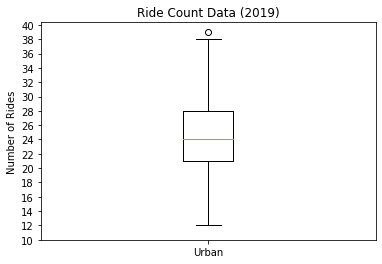

In [192]:
# create a box/whisker chart
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid
plt.show()


In [195]:
# This is a same summary as the box/whisker plot showing high-level sumry stats.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

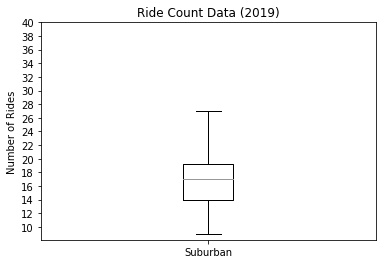

In [196]:
# SKILL DRILL create a box/whisker chart for Suburban rides
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid
plt.show()

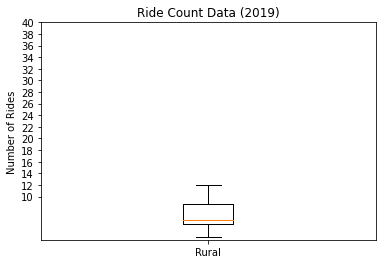

In [197]:
# SKILL DRILL create a box/whisker chart for Rural rides
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid
plt.show()

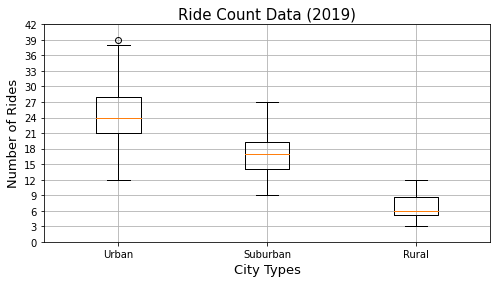

In [240]:
# add all ride count plots to same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Ride Count Data (2019)', fontsize=15)
ax.set_ylabel('Number of Rides', fontsize=13)
ax.set_xlabel("City Types", fontsize=13)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

#save fig
plt.savefig("/Users/damonphillips/Desktop/bootcamp/week_5_Matplotlib/PyBer_Analysis/fig2.png")
plt.show()


#### note outliers and rural is 3-4x lower than other city types!!

In [218]:
# get the city that matches 39 (the outlier)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


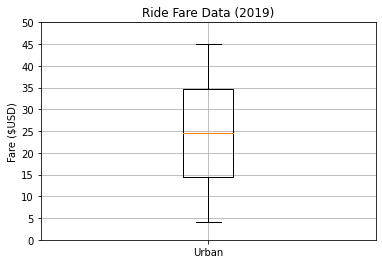

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [235]:
# create box plots for the ride fare data with summary stats.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)') 
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

In [244]:
suburban_fares = suburban_cities_df["fare"]


In [245]:
rural_fares = rural_cities_df["fare"]


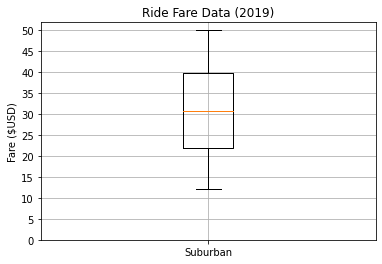

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [246]:
# SKILL DRILL - create box plots for the suburban and rural fares with summary stats.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)') 
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

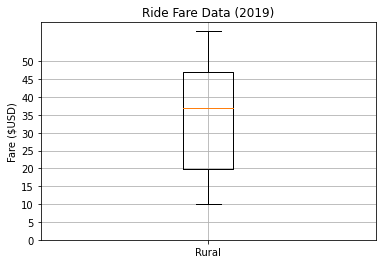

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [247]:
# SKILL DRILL - create box plots for the suburban and rural fares with summary stats.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)') 
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

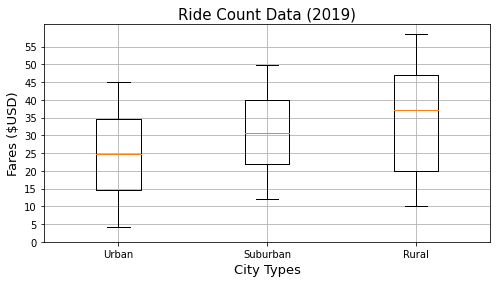

In [272]:
# SKILL DRILL - add all ride fares plot by city to same graph
x_labels = ["Urban", "Suburban", "Rural"]
fare_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Ride Count Data (2019)', fontsize=15)
ax.set_ylabel('Fares ($USD)', fontsize=13)
ax.set_xlabel("City Types", fontsize=13)
ax.boxplot(fare_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

#save fig
plt.savefig("/Users/damonphillips/Desktop/bootcamp/week_5_Matplotlib/PyBer_Analysis/fares_fig1.png")
plt.show()

In [297]:
# SKILL DRILL - 
x_labels = ["Urban", "Sububan", "Rural"]
driver_count_data = [urban_count]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

# add the title, y-axis label and grid
ax.set_title('Driver Count Data (2019)') 
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 40, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

NameError: name 'urban_count' is not defined

In [292]:
# get the driver count data from the urban cities
#suburban_drivers = suburban_XXXXities_df['driver_count']

urban_drivers = urban_cities_df['driver_count']
urban_drivers


0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

In [295]:
# SKILL DRILL - add all ride fares plot by city to same graph
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [driver_counts]

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Driver Count Data (2019)', fontsize=15)
ax.set_ylabel('Number of Drivers', fontsize=13)
ax.set_xlabel("City Types", fontsize=13)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

#save fig
plt.savefig("/Users/damonphillips/Desktop/bootcamp/week_5_Matplotlib/PyBer_Analysis/drivers_fig4.png")
plt.show()

NameError: name 'driver_counts' is not defined

In [291]:
driver_count_data


[0        5
 1       72
 2       57
 3       34
 4       46
         ..
 1620    67
 1621    41
 1622    11
 1623     3
 1624    57
 Name: driver_count, Length: 1625, dtype: int64,
 1625    11
 1626    20
 1627    22
 1628    19
 1629    12
         ..
 2245    12
 2246     4
 2247    23
 2248     5
 2249    17
 Name: driver_count, Length: 625, dtype: int64,
 2250    9
 2251    8
 2252    6
 2253    2
 2254    2
        ..
 2370    6
 2371    2
 2372    1
 2373    4
 2374    1
 Name: driver_count, Length: 125, dtype: int64]

In [ ]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fair price for urban trips is ${mean_urban_fares:.2f}.")
urban_drivers

median_urban_fares = np.median(urban_fares)
print(f"The median fair price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

#### 5.4.4 Create Box-and-Whisker Plots

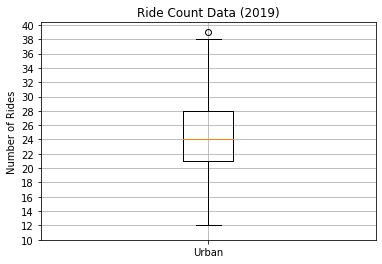

In [303]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [304]:
# this shows the summary stats for the box plot data above.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

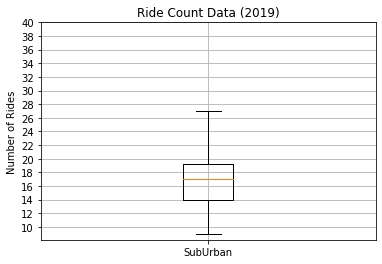

In [305]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["SubUrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

#### SKILL DRILL - calc the summary stats for sub and rural cities ride count.

In [315]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

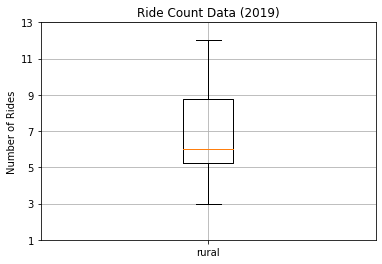

In [312]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(1, 15, step=2.0))
ax.grid()
plt.show()

In [316]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

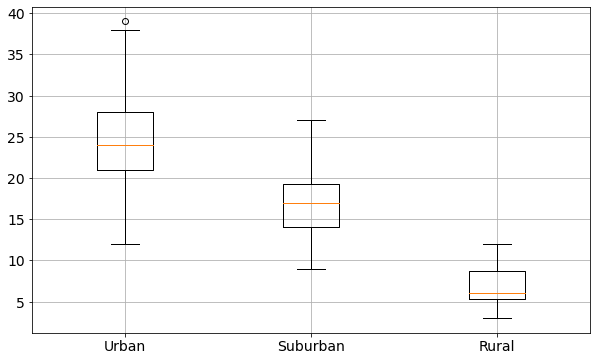

In [351]:
# Plot to show all 3 city ride counts  
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))


ax.boxplot(ride_count_data, labels=x_labels)
ax.grid()
plt.savefig("/Users/damonphillips/Desktop/bootcamp/week_5_Matplotlib/fig2x.png")

##### calculate the percentage of the total fares for each city type based on the total fares, we will:
Use the groupby() function on the pyber_data_df DataFrame and group by the type of city column so the type of city is the index.
Apply the sum() method on the fare column to get the Series with the total number of fares for each city type.
Divide the total fares for each city type by the total of all the fares and multiply by 100.

In [321]:
# get sum of the fares for each city.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [322]:
# next get total fares by using sum() method on fare column
#of the pyberdata df

#get the sum of all fares
total_fares = pyber_data_df["fare"].sum()
total_fares


63538.64

In [324]:
# next calc the % of total fares for each city type and divide 
#sum_fares_by_type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [333]:
# !! A second way to calc the percentage of fare for each city type. (like above)
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

###### create pie chart using matlab approach with colors.  create a pie chart with the plt.pie() function, we need an array that contains the values and labels we are plotting.

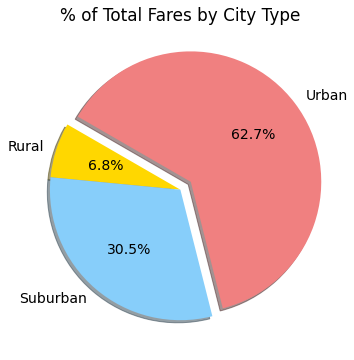

In [389]:
# build the percentage of fares by city type - pie chart
import matplotlib as mpl
# build pie chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")\
# change font size using mps.rcParams!
mpl.rcParams['font.size'] = 14
#save figure
plt.savefig("/Users/damonphillips/Desktop/bootcamp/week_5_Matplotlib/fig5.png")
#show figure
plt.show()

### 5.6.1 Calc Ride Percentages

In [354]:
# use groupby function on pyber DataFrame and group by the type of city col.
pyber_data_df.groupby(["type"]).count()["ride_id"]

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [355]:
# get the number of total rides using the count() f on ride_id col.
pyber_data_df["ride_id"].count()

2375

In [360]:
# calc the percentage of rides for each city.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents 

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [ ]:
5.6.2 Create pie charte for percentages

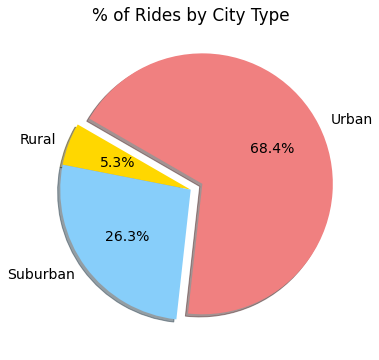

In [362]:
# build the percentage of fares by city type - pie chart
import matplotlib as mpl
# build pie chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Rides by City Type")\
# change font size using mps.rcParams!
mpl.rcParams['font.size'] = 14
#save figure
plt.savefig("/Users/damonphillips/Desktop/bootcamp/week_5_Matplotlib/fig6.png")
#show figure
plt.show()

#### 5.7.1 Chart percentage of total drivers by city. 
To create this pie chart, we need to do the following:

Get the total number of drivers for each city type.
Get the total drivers for all the city types.
Calculate the percentage of the total drivers for each city type.

In [381]:
# calculate the percentage of drivers for each city.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] /city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

In [382]:
#### 5.7.2 Pie chart for percentage of drivers for each city type

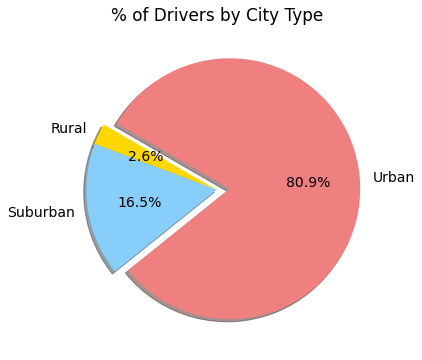

In [385]:
# build the percentage of fares by city type - pie chart
import matplotlib as mpl
# build pie chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Drivers by City Type")\
# change font size using mps.rcParams!
mpl.rcParams['font.size'] = 14
#save figure
plt.savefig("/Users/damonphillips/Desktop/bootcamp/week_5_Matplotlib/fig7.png")
#show figure
plt.show()

In [ ]:
#### END